## K-Nearest Neighbours Implementation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Rig\\Work\\ML ig\\UnKnown_Dataset")

In [3]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [4]:
df.shape

(1000, 11)

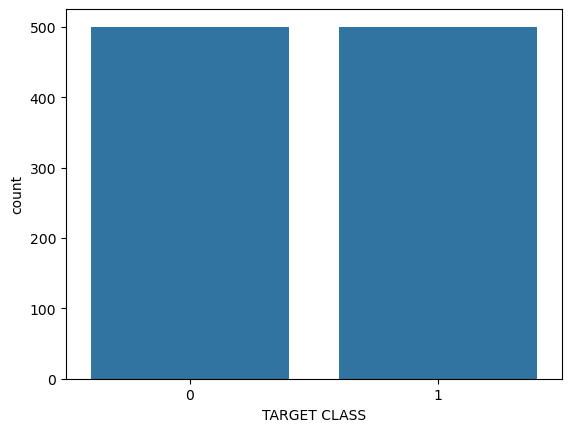

In [5]:
p=sns.countplot(x='TARGET CLASS', data=df)
plt.show()

#### Nice.

In [7]:
df = df.dropna()

In [8]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [9]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [12]:
y_pred = knn.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy score:",accuracy_score(y_test, y_pred))

Accuracy score: 0.75


In [14]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75       100
           1       0.75      0.76      0.75       100

    accuracy                           0.75       200
   macro avg       0.75      0.75      0.75       200
weighted avg       0.75      0.75      0.75       200



In [15]:
print(confusion_matrix(y_test, y_pred))

[[74 26]
 [24 76]]


In [16]:
error_rate=[]

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    i_pred = knn.predict(X_test)
    error_rate.append(np.mean(i_pred != y_test))    

Text(0, 0.5, 'Error Rate')

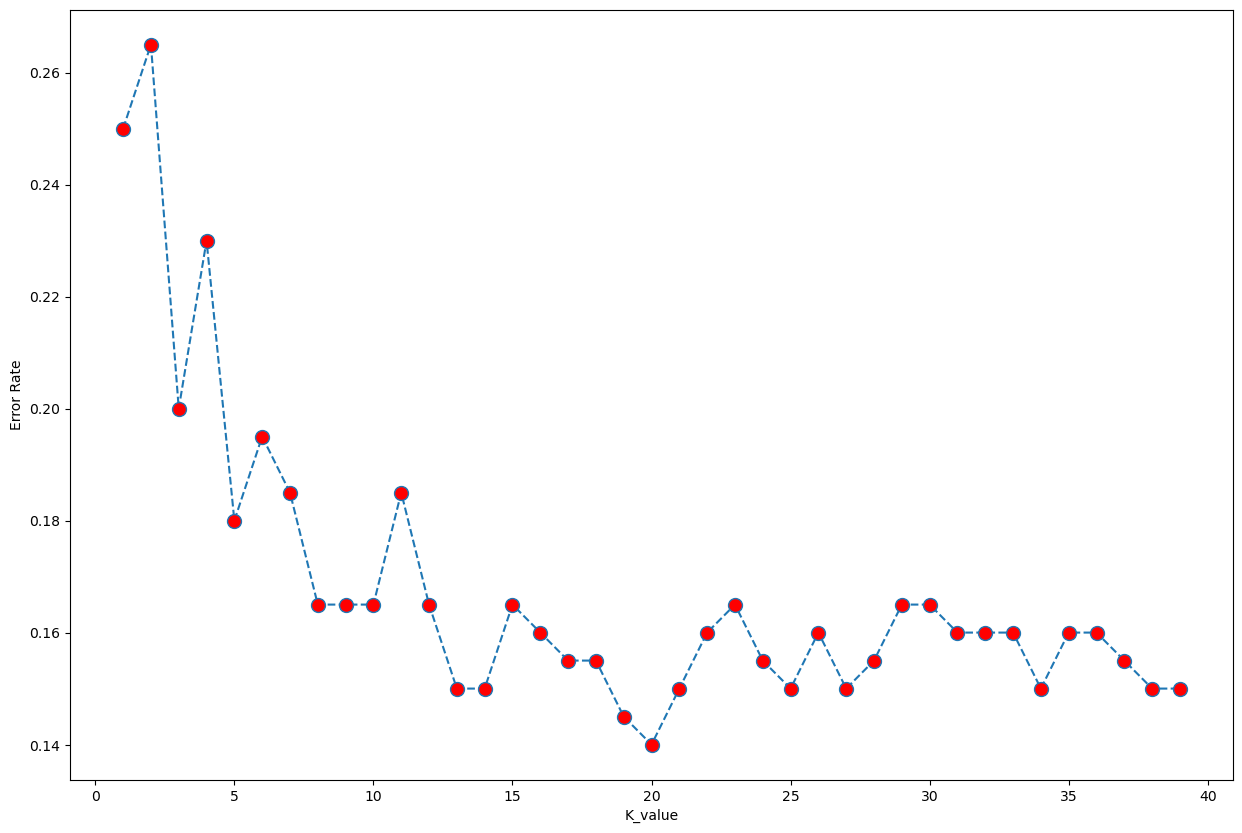

In [17]:
plt.figure(figsize=(15,10))
plt.plot(range(1,40), error_rate, linestyle='dashed',marker='o', markerfacecolor='red',markersize=10)

plt.xlabel('K_value')
plt.ylabel('Error Rate')

In [18]:
accuracy=[]

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    i_pred = knn.predict(X_test)
    accuracy.append(accuracy_score(y_test, i_pred))
    print("when K = "+str(i))
    print("the accuracy is: ",(accuracy[i-1]))

when K = 1
the accuracy is:  0.75
when K = 2
the accuracy is:  0.735
when K = 3
the accuracy is:  0.8
when K = 4
the accuracy is:  0.77
when K = 5
the accuracy is:  0.82
when K = 6
the accuracy is:  0.805
when K = 7
the accuracy is:  0.815
when K = 8
the accuracy is:  0.835
when K = 9
the accuracy is:  0.835
when K = 10
the accuracy is:  0.835
when K = 11
the accuracy is:  0.815
when K = 12
the accuracy is:  0.835
when K = 13
the accuracy is:  0.85
when K = 14
the accuracy is:  0.85
when K = 15
the accuracy is:  0.835
when K = 16
the accuracy is:  0.84
when K = 17
the accuracy is:  0.845
when K = 18
the accuracy is:  0.845
when K = 19
the accuracy is:  0.855
when K = 20
the accuracy is:  0.86
when K = 21
the accuracy is:  0.85
when K = 22
the accuracy is:  0.84
when K = 23
the accuracy is:  0.835
when K = 24
the accuracy is:  0.845
when K = 25
the accuracy is:  0.85
when K = 26
the accuracy is:  0.84
when K = 27
the accuracy is:  0.85
when K = 28
the accuracy is:  0.845
when K = 29
the

Text(0, 0.5, 'Accuracy')

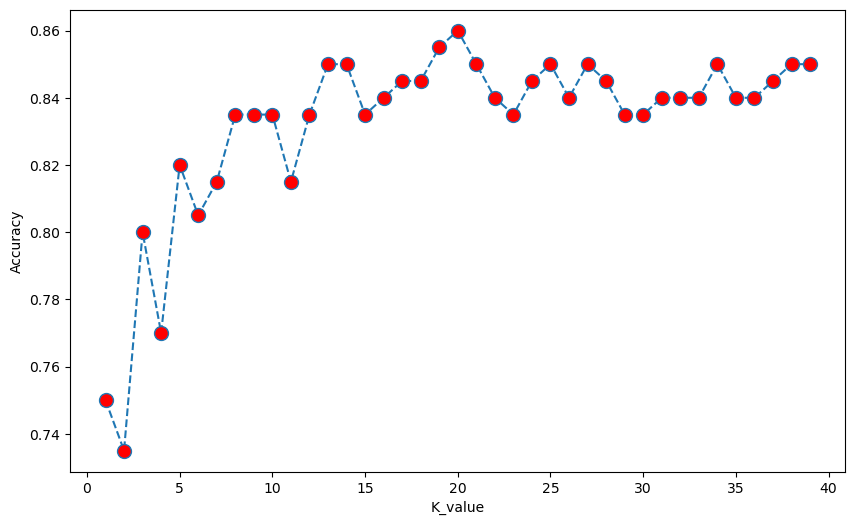

In [19]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), accuracy,linestyle='dashed',marker='o', markerfacecolor='red',markersize=10)

plt.xlabel('K_value')
plt.ylabel('Accuracy')

In [20]:
knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print('Accuracy: ',accuracy_score(y_test, pred))

Accuracy:  0.85


In [21]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86       100
           1       0.88      0.81      0.84       100

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.85      0.85      0.85       200



In [22]:
print(confusion_matrix(y_test, pred))

[[89 11]
 [19 81]]
